In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

from time import time
import numpy as np

torch.set_default_dtype(torch.float64)

# Test 1: Increasing variables

Program test: TrueSkills

Same number of components, increasing number of variables

```
skill1 = gm([1.],[100.],[10.]);
...
skillN = gm([1.],[100.],[10.]);

perf1 = gm([1.],[0.],[15.])+skill1;
...
perfN = gm([1.],[0.],[15.])+skillN;
    
observe(perf1-perf2 > 0);
observe(perf2-perf3 > 0);
...
observe(perf(N-1)-perfN > 0);
```

In [13]:
file_path = '../programs/SOGA/Scalability/Trueskills/Trueskills'

n_reps = 100

N_values = [5,10,20,30,50]
times = []

for N in N_values:

    times_batch = []

    for _ in range(n_reps):
            
        compiledFile=compile2SOGA(file_path + str(N) + '.soga')
        cfg = produce_cfg(compiledFile)
    
        start = time()
        output_dist = start_SOGA(cfg)
        end = time()
        
        times_batch.append(end-start)
    
    times.append(np.mean(times_batch))

    print('TrueSkills{}: {} variables, {} seconds'.format(N, 2*N, end-start))

TrueSkills5: 10 variables, 0.021597623825073242 seconds
TrueSkills10: 20 variables, 0.05297589302062988 seconds
TrueSkills20: 40 variables, 0.13327908515930176 seconds
TrueSkills30: 60 variables, 0.2180805206298828 seconds
TrueSkills50: 100 variables, 0.3997154235839844 seconds


In [14]:
np_times = [0.014942784309387207, 0.02259697675704956, 0.08378940105438232, 0.1228815770149231, 0.2339174771308899]
gpu_times = [0.020869016647338867, 0.05206704139709473, 0.09406828880310059, 0.1491255760192871, 0.26798343658447266]

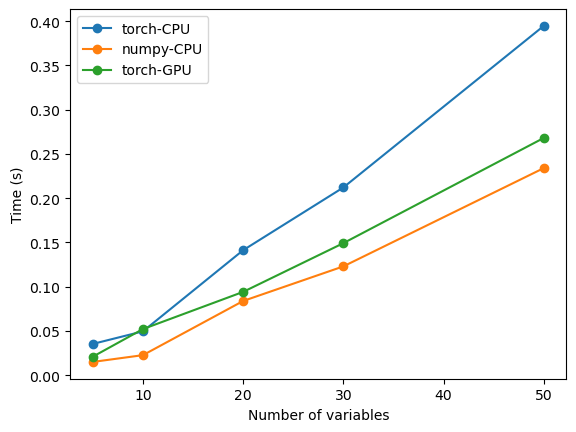

In [15]:
import matplotlib.pyplot as plt

plt.plot(N_values, times, marker='o', label='torch-CPU')
plt.plot(N_values, np_times, marker='o', label='numpy-CPU') 
plt.plot(N_values, gpu_times, marker='o', label='torch-GPU')
plt.xlabel('Number of variables')
plt.ylabel('Time (s)')
plt.legend()

# Test 2: Increasing components

Program test: Thermostat

Same number of variables, increasing number of components

```
currT = gauss(16, 1.);        
isOn = gauss(0, 1);           

for i in range(16) {

    if isOn > 0 {
        newT = 0.99*currT + 0.5 + gauss(0., 1);
    } else {
        newT = 0.99*currT + gauss(0., 1);
    } end if;

    currT = newT + gauss(0., 0.5); 

} end for;
      
```

In [9]:
file_path = '../programs/SOGA/Scalability/Thermostat/Thermostat'

n_reps = 10

N_values = [2,4,6,8,10,12,14,16]
times = []

for N in N_values:

    times_batch = []

    for _ in range(n_reps):
            
        compiledFile=compile2SOGA(file_path + str(N) + '.soga')
        cfg = produce_cfg(compiledFile)
    
        start = time()
        output_dist = start_SOGA(cfg)
        end = time()
        
        times_batch.append(end-start)
    
    times.append(np.mean(times_batch))

    print('Thermostat{}: {} components, {} seconds'.format(N, output_dist.gm.n_comp(), end-start))

Thermostat2: 4 components, 0.0028793811798095703 seconds
Thermostat4: 16 components, 0.0312650203704834 seconds
Thermostat6: 64 components, 0.038002967834472656 seconds
Thermostat8: 256 components, 0.11560392379760742 seconds
Thermostat10: 1024 components, 0.10143375396728516 seconds
Thermostat12: 4092 components, 0.1621084213256836 seconds
Thermostat14: 14418 components, 0.14711618423461914 seconds
Thermostat16: 37260 components, 0.21571898460388184 seconds


In [10]:
np_times = [0.015899848937988282, 0.03745429515838623, 0.13621771335601807, 0.4755441904067993, 2.307063031196594]
gpu_times = [0.01690070629119873, 0.03143763542175293, 0.04762709140777588, 0.061783456802368165, 0.08069424629211426, 0.10743415355682373, 0.16327598094940185, 0.3234932661056519]

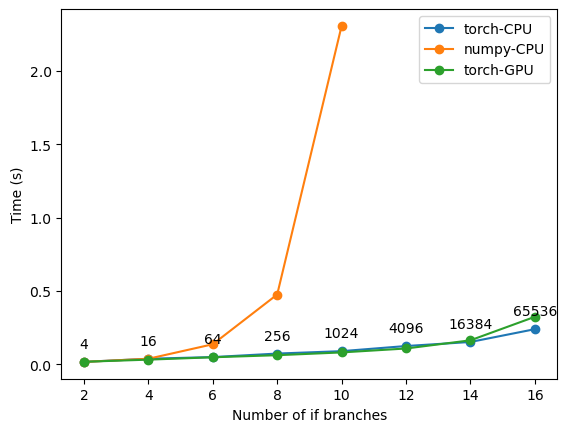

In [17]:
import matplotlib.pyplot as plt

plt.plot([N for N in N_values], times, marker='o', label='torch-CPU')
plt.plot([N for N in N_values[:len(np_times)]], np_times, marker='o', label='numpy-CPU') 
plt.plot([N for N in N_values], gpu_times, marker='o', label='torch-GPU')

# Annotate each point in the torch-CPU plot
for i, (N, time) in enumerate(zip(N_values, times)):
    plt.annotate(f'{2**N}', (N, time), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of if branches')
plt.ylabel('Time (s)')
plt.legend()